# Example 1: cross-correlation

Create two signals x1 and x2, each representing a Gaussian sin wave at a frequency of 50 Hz, with a sampling rate of 1000 Hz. The first signal x1 contains the Gaussian sin wave at 1 second, and the second signal x2 contains the Gaussian sin wave at 10 second.

Your task is to:

Calculate the cross-correlation between the two signals using the np.correlate function with mode='same'.

Plot the two signals and the cross-correlation in three subplots in a single figure.

Identify the time lag at which the two signals are maximally correlated by finding the index of the maximum value of the cross-correlation.

Print out the time lag in seconds between the two signals.

Lag:  -9.0 seconds


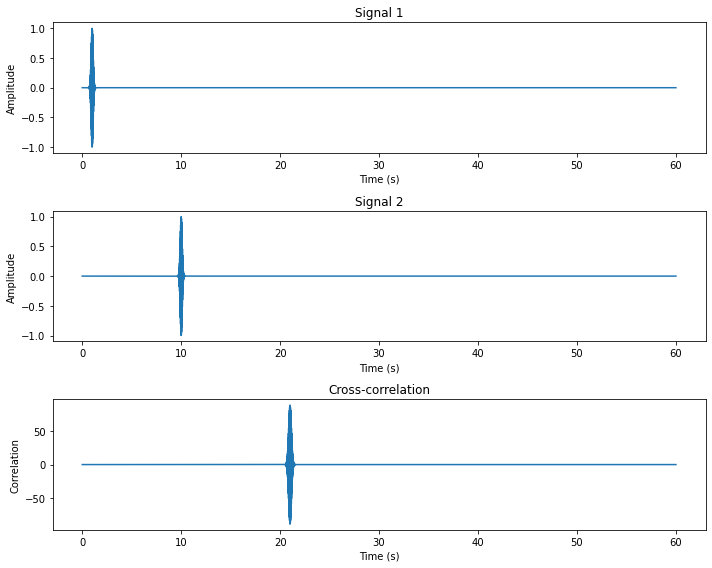

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# set sampling rate and time points
Fs = 1000
t = np.arange(0, 60, 1/Fs)

# create Gaussian sin wave with frequency 50 Hz
x1 = np.sin(2*np.pi*50*t) * np.exp(-0.5*(t-1)**2/(0.1**2))
x2 = np.sin(2*np.pi*50*t) * np.exp(-0.5*(t-10)**2/(0.1**2))

# calculate cross-correlation
corr = np.correlate(x1, x2, mode='same')

lag = np.argmax(corr) - len(corr)//2
print('Lag: ', lag/Fs, 'seconds')

# plot signals and cross-correlation
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, x1)
axs[0].set_title('Signal 1')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, x2)
axs[1].set_title('Signal 2')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

axs[2].plot(t, corr)
axs[2].set_title('Cross-correlation')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Correlation')

plt.tight_layout()
plt.show()


# Example 2: Granger Causality

Generate two sin waves at frequency 50 Hz (x and y) with 200 observations each.

The sampling rate should be 1000Hz.

Add some random noise to the datasets.

Add correlation to y by adding a sin wave at 5 Hz to the first 50 observations and another sin wave at 5 Hz to observations 100 to 150.

Calculate the Granger causality between x and y.

Print the test results.

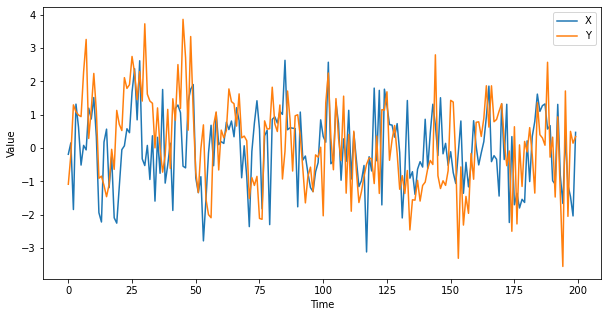

In [8]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# generate some sample data
nobs = 200
t = np.arange(nobs)
x = np.sin(2*np.pi*50*t/1000) + np.random.randn(nobs)
y = np.sin(2*np.pi*50*t/1000) + np.random.randn(nobs)

y[0:50] += np.sin(2*np.pi*5*t[0:50]/1000)  # add some correlation to y
#y[0:50] = np.sin(2*np.pi*5*t[0:50]/1000) +y[0:50]

y[100:150] += np.sin(2*np.pi*5*t[100:150]/1000)  # add some correlation to y

# visualize the data
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, x, label='X')
ax.plot(t, y, label='Y')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.show()


<StemContainer object of 3 artists>

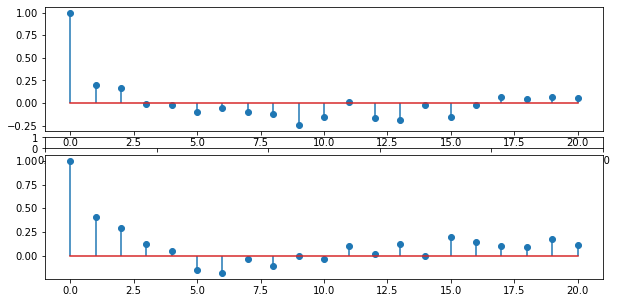

In [15]:
from statsmodels.tsa.stattools import pacf
# Compute the PACF of the time series data
pacf_y = pacf(y, nlags=20)
pacf_x = pacf(x, nlags=20)

# Create a plot of the PACF values
fig, ax = plt.subplots(21,figsize=(10,5))
plt.subplot(211)
plt.stem(pacf_x)
plt.subplot(212)
plt.stem(pacf_y)

In [16]:
# run the Granger causality test
maxlag_x = 3
maxlag_y = 4
maxlag = max(maxlag_x, maxlag_y) # choose the larger maxlag value
test_results = grangercausalitytests(np.column_stack((y, x)), maxlag, verbose=False)

# print the test results
for lag in range(1, maxlag+1):
    print(f'Lag {lag}:')
    if test_results[lag][0] is not None:
        print(f'F-Statistic: {test_results[lag][0]["params_ftest"][0]:.4f}, p-value: {test_results[lag][0]["params_ftest"][1]:.4f}')
    else:
        print("No significant Granger causality.")

Lag 1:
F-Statistic: 2.9881, p-value: 0.0855
Lag 2:
F-Statistic: 0.7100, p-value: 0.4929
Lag 3:
F-Statistic: 1.0532, p-value: 0.3703
Lag 4:
F-Statistic: 0.9309, p-value: 0.4472
